# A/B Hypothesis Testing for Online Store

<b>Project Description</b> <a class="tocSkip"></a>

I am an analyst at a big online store. Together with the marketing department, I've compiled a list of hypotheses that may help boost revenue.
I need to prioritize these hypotheses, launch an A/B test, and analyze the results.

<b>Description of the data</b> <a class="tocSkip"></a>


<b>Data used in the first part of the project</b> <a class="tocSkip"></a>

DATASET- /datasets/hypotheses_us.csv


Hypothesis — brief descriptions of the hypotheses 

Reach — user reach, on a scale of one to ten

Impact — impact on users, on a scale of one to ten

Confidence — confidence in the hypothesis, on a scale of one to ten

Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the effort value, the more resource-intensive the test.

<b>Data used in the second part of the project</b> <a class="tocSkip"></a>

DATASET- /datasets/orders_us.csv

transactionId — order identifier

visitorId — identifier of the user who placed the order

date — of the order

revenue — from the order

group — the A/B test group that the user belongs to



DATASET- /datasets/visits_us.csv

date — date

group — A/B test group

visits — the number of visits on the date specified in the A/B test group specified

Make sure to preprocess the data. There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B.

# Download and Pre Process the Data

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
from scipy import stats as st

In [2]:
#load the data

try:
    hypothesis= pd.read_csv('/datasets/hypotheses_us.csv', sep= ';')
    orders= pd.read_csv('/datasets/orders_us.csv')
    visits= pd.read_csv('/datasets/visits_us.csv')
except:
    hypothesis= pd.read_csv('hypotheses_us.csv', sep= ';')
    orders= pd.read_csv('orders_us.csv')
    visits= pd.read_csv('visits_us.csv')


In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


It looks like the column names are in the correct format. And the 'Hypothesis' column has the information cut off. 

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


There doesn't seem to be any missing values, and all the datatypes are appropriate

In [5]:
hypothesis.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [6]:
#adjusting the column side to show more information in each row
pd.set_option('display.max_colwidth', int(hypothesis['Hypothesis'].apply(len).max()))
#pd.set_option('display.max_colwidth', -1)

In [7]:
#changing the column names to lower case
hypothesis= hypothesis.rename(str.lower, axis= 'columns')

hypothesis

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more qui...,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


Now we can see more information in the 'hypothesis' column, and the column names are all in lower case

In [8]:
hypothesis.duplicated().sum()

0

There are no duplicate rows. This dataset looks ready for analysis.

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


The column names could be adjusted a bit to be easier to read. 

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


There doesn't seem to be any missing values, however, the datatypes should be changed to the appropriate datatypes.

In [11]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [12]:
#changing the column names
orders = orders.rename(columns= {'transactionId':'transaction_id', 'visitorId':'visitor_id','date':'date', 'revenue':'revenue','group':'group'})

#converting columns to appropriate datatypes
orders['date'] = pd.to_datetime(orders['date'], format= '%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [13]:
orders.duplicated().sum()

0

There are no duplicates. Now the orders dataset is ready for analysis.

In [14]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


There doesn't seem to be any missing values, but the date column datatype should be changed. 

In [16]:
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [17]:
#converting date column to datetime datatype
visits['date'] = pd.to_datetime(visits['date'], format= '%Y-%m-%d')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Now the visits dataset is ready for analysis.

In [18]:
# the reviewer's code:
visits.duplicated().sum()

0

In [19]:
# the reviewer's code:

# group the data by unique user_id and calculcate the number of unique test groups
# after that sort the data by users who has more that 1 group: 
len(orders.groupby('visitor_id').agg({'group':'nunique'}).query('group > 1'))

58

# Part 1. Prioritizing Hypotheses

The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.

The task is to:

* Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

* Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

* Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

ICE and RICE are one of the most popular ways of prioritizing problems.

The omponents of RICE/ICE:

Reach — how many users will be affected by the update you want to introduce

Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product

Confidence — how sure you are that your product will affect them in this way

Effort — how much will it cost to test the hypothesis

Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [20]:
#creating a new 'ICE' column and calculating using ICE formula
hypothesis['ICE']= (hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['effort']
hypothesis['ICE']= hypothesis['ICE'].round(decimals= 2)

#sorting in descending order
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.00
1,Launch your own delivery service. This will shorten delivery time,2.00
5,Add a customer review page. This will increase the number of orders,1.33
3,Change the category structure. This will increase conversion since users will find the products they want more qui...,1.12
4,Change the background color on the main page. This will increase user engagement,1.00


Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [21]:
#creating 'RICE' column and calculating RICE formula
hypothesis['RICE']= (hypothesis['reach'] * hypothesis['impact']*hypothesis['confidence'])/ hypothesis['effort']

#sorting in descending order
hypothesis[['hypothesis', 'RICE']].sort_values(by= 'RICE', ascending= False)

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more qui...,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

In [22]:
#sorting values by 'RICE'
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more qui...,8,3,3,8,1.12,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00,3.0


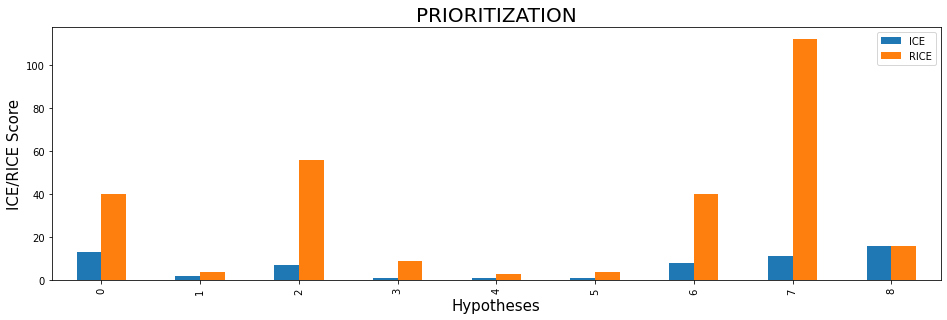

In [23]:
#bar plot to show 'ICE' and 'RICE' scores
ice_rice_graph= pd.DataFrame(hypothesis, columns= ['hypothesis','ICE', 'RICE'])
ice_rice_graph.plot.bar(figsize= (13,4))
plt.tight_layout()

plt.title('PRIORITIZATION', size= 20)
plt.xlabel('Hypotheses', size= 15)
plt.ylabel('ICE/RICE Score', size= 15)
plt.show()


GUIDE:
    
0 - Add two new channels for attracting traffic. This will bring 30% more users

1 - Launch your own delivery service. This will shorten delivery time

2 - Add product recommendation blocks to the store's site. This will increase conversion and average purchase size	

3 - Change the category structure. This will increase conversion since users will find the products they want more quickly

4 - Change the background color on the main page. This will increase user engagement	

5 - Add a customer review page. This will increase the number of orders	

6 - Show banners with current offers and sales on the main page. This will boost conversion	

7 - Add a subscription form to all the main pages. This will help you compile a mailing list	

8 - Launch a promotion that gives users discounts on their birthdays

According to the RICE scores, the top 3 most important are number 7, 2, and 0. While according to the ICE scores, the top 3 are number 8, 0, and 7. Based on these findings, it might be best to prioritize numbers 7 and/or 0 first. 

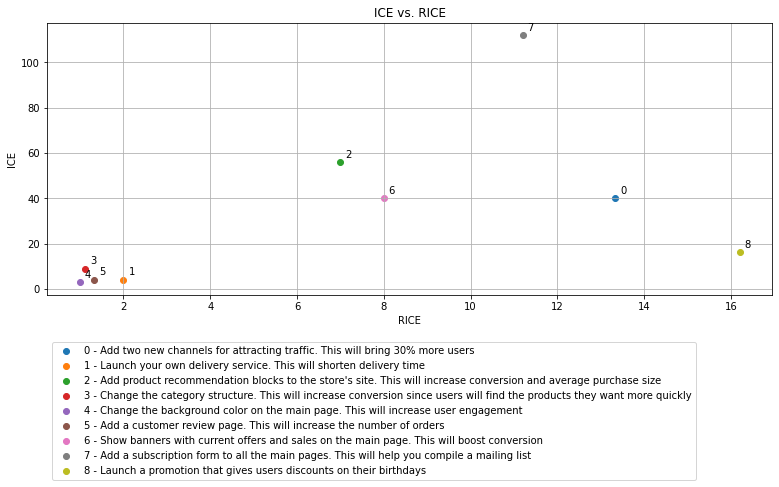

In [24]:
# The reviewer's code:
fig, ax = plt.subplots(figsize=(13, 5))

ax.set_xlabel('RICE')
ax.set_ylabel('ICE')
ax.set_title('ICE vs. RICE')

for i, txt in enumerate(hypothesis.index.values):
    legend = (str(txt) + ' - ' + str(hypothesis['hypothesis'][i]))    
    ax.annotate(txt, (hypothesis['ICE'][i], hypothesis['RICE'][i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(hypothesis['ICE'][i], hypothesis['RICE'][i], label = legend)
    
plt.grid(True)  
plt.legend(loc="lower left",  bbox_to_anchor=(0, -0.7))

plt.show()

# Part 2. A/B Test Analysis

You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.

<b>Tasks</b> <a class="tocSkip"></a>

Analyze the A/B test:

Graph cumulative revenue by group. Make conclusions and conjectures.

Graph cumulative average order size by group. Make conclusions and conjectures.

Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and 
conjectures.

Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

Plot a scatter chart of order prices. Make conclusions and conjectures.

Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

Find the statistical significance of the difference in average order size between the groups using the filtered data. 
Make conclusions and conjectures.

Make a decision based on the test results. The possible decisions are: 
1. Stop the test, consider one of the groups the leader. 
2. Stop the test, conclude that there is no difference between the groups. 
3. Continue the test.

<b>Cumulative revenue by group</b>

In [25]:
#organizing sum of revenue by each group by date, and filtering only group A
orders_rev = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
orders_rev_a= orders_rev[orders_rev['group']== 'A']
orders_rev_a['cum_rev_a']= orders_rev_a['revenue'].cumsum()
orders_rev_a.drop('revenue', axis=1, inplace=True)
orders_rev_a.head()

/tmp/ipykernel_89/2683111348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_rev_a['cum_rev_a']= orders_rev_a['revenue'].cumsum()
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,date,group,cum_rev_a
0,2019-08-01,A,2356.8
2,2019-08-02,A,3860.3
4,2019-08-03,A,5675.5
6,2019-08-04,A,6822.1
8,2019-08-05,A,8810.2


In [26]:
#organizing sum of revenue by each group by date, and filtering only group B
orders_rev = orders.groupby(['date', 'group'])['revenue'].sum().reset_index()
orders_rev_b= orders_rev[orders_rev['group']== 'B']
orders_rev_b['cum_rev_b']= orders_rev_b['revenue'].cumsum()
orders_rev_b.drop('revenue', axis=1, inplace=True)
orders_rev_b.head()

/tmp/ipykernel_89/798132596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_rev_b['cum_rev_b']= orders_rev_b['revenue'].cumsum()
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,date,group,cum_rev_b
1,2019-08-01,B,1620.0
3,2019-08-02,B,4243.8
5,2019-08-03,B,6050.6
7,2019-08-04,B,7767.9
9,2019-08-05,B,9262.9


In [27]:
#combining revenue from group A and B
cum_rev = pd.merge(orders_rev_a, orders_rev_b, on='date').set_index('date')
cum_rev.head()

,group_x,cum_rev_a,group_y,cum_rev_b
date,,,,
2019-08-01,A,2356.8,B,1620.0
2019-08-02,A,3860.3,B,4243.8
2019-08-03,A,5675.5,B,6050.6
2019-08-04,A,6822.1,B,7767.9
2019-08-05,A,8810.2,B,9262.9


In [28]:
#dropping any additional columns
cum_rev= cum_rev.drop(columns= ['group_x', 'group_y'], axis=1)
cum_rev.head()

,cum_rev_a,cum_rev_b
date,,
2019-08-01,2356.8,1620.0
2019-08-02,3860.3,4243.8
2019-08-03,5675.5,6050.6
2019-08-04,6822.1,7767.9
2019-08-05,8810.2,9262.9


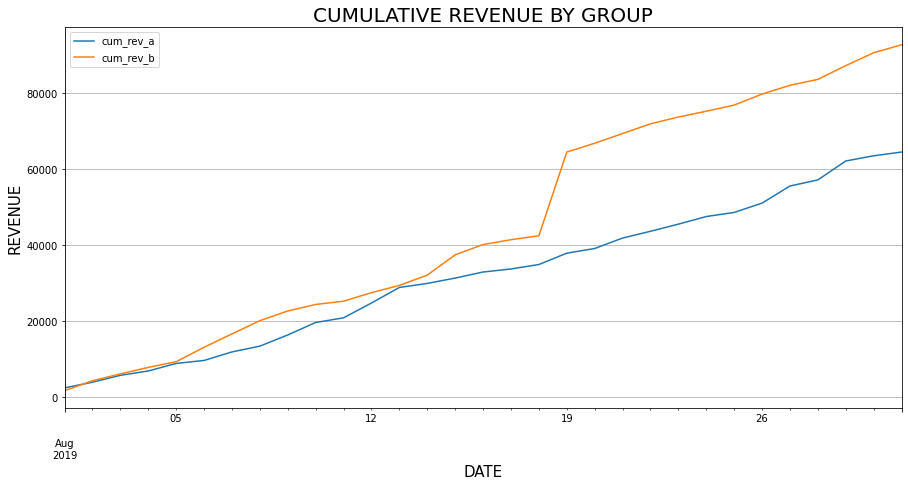

In [29]:
#plotting to see group A and B cumulative revenue
cum_rev.plot(kind= 'line', figsize= (15,7))
plt.title('CUMULATIVE REVENUE BY GROUP', size= 20)
plt.xlabel('DATE', size= 15)
plt.ylabel('REVENUE', size= 15)
plt.grid()
plt.show()


For both groups A and B, the cumulative revenue seems to be pretty similar. However, around August 18th group B's revenue increases dramatially. It could be that there was an unusually large order that cause group B's data to skew. 

<b>Cumulative average order size by group</b>

In [30]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [31]:
#calculating the cumulative sum for each date for each group and filtering only group A
avg_orders = orders.groupby(['date', 'group']).agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()
avg_orders_a = avg_orders.query('group== "A"')
avg_orders_a['cum_rev']= avg_orders_a['revenue'].cumsum()
avg_orders_a['cum_orders']= avg_orders_a['transaction_id'].cumsum()
avg_orders_a.head()


/tmp/ipykernel_89/1341528365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_orders_a['cum_rev']= avg_orders_a['revenue'].cumsum()
/tmp/ipykernel_89/1341528365.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_orders_a['cum_orders']= avg_orders_a['transaction_id'].cumsum()


,date,group,revenue,transaction_id,cum_rev,cum_orders
0,2019-08-01,A,2356.8,24,2356.8,24
2,2019-08-02,A,1503.5,20,3860.3,44
4,2019-08-03,A,1815.2,24,5675.5,68
6,2019-08-04,A,1146.6,16,6822.1,84
8,2019-08-05,A,1988.1,25,8810.2,109


In [32]:
#creating a new column and finding the average cumulative orders for group A
avg_orders_a['avg_cum_rev_a'] = avg_orders_a['cum_rev']/ avg_orders_a['cum_orders']
avg_orders_a.head()



#means_groups_A['cum_mean_rev'] = means_groups_A['cum_rev'] / means_groups_A['cum_orders']
#means_groups_A = means_groups_A.reset_index().drop(['group', 'revenue', 'transaction_id'], axis=1)
#means_groups_A.set_index('date', inplace=True)

/tmp/ipykernel_89/763773743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_orders_a['avg_cum_rev_a'] = avg_orders_a['cum_rev']/ avg_orders_a['cum_orders']


,date,group,revenue,transaction_id,cum_rev,cum_orders,avg_cum_rev_a
0,2019-08-01,A,2356.8,24,2356.8,24,98.200000
2,2019-08-02,A,1503.5,20,3860.3,44,87.734091
4,2019-08-03,A,1815.2,24,5675.5,68,83.463235
6,2019-08-04,A,1146.6,16,6822.1,84,81.215476
8,2019-08-05,A,1988.1,25,8810.2,109,80.827523


In [33]:
#calculating the cumulative sum for each date for each group and filtering only group B
avg_orders = orders.groupby(['date', 'group']).agg({'revenue': 'sum', 'transaction_id': 'count'}).reset_index()
avg_orders_b = avg_orders.query('group== "B"')
avg_orders_b['cum_rev']= avg_orders_b['revenue'].cumsum()
avg_orders_b['cum_orders']= avg_orders_b['transaction_id'].cumsum()

#creating a new column and finding the average cumulative orders for group A
avg_orders_b['avg_cum_rev_b'] = avg_orders_b['cum_rev']/ avg_orders_b['cum_orders']
avg_orders_b.head()
#avg_orders_b['mean_order_b']= avg_orders['revenue']/ avg_orders['transaction_id']
#avg_orders_b['total_']

/tmp/ipykernel_89/450088652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_orders_b['cum_rev']= avg_orders_b['revenue'].cumsum()
/tmp/ipykernel_89/450088652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_orders_b['cum_orders']= avg_orders_b['transaction_id'].cumsum()
/tmp/ipykernel_89/450088652.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,date,group,revenue,transaction_id,cum_rev,cum_orders,avg_cum_rev_b
1,2019-08-01,B,1620.0,21,1620.0,21,77.142857
3,2019-08-02,B,2623.8,24,4243.8,45,94.306667
5,2019-08-03,B,1806.8,16,6050.6,61,99.190164
7,2019-08-04,B,1717.3,17,7767.9,78,99.588462
9,2019-08-05,B,1495.0,23,9262.9,101,91.711881


In [34]:
#combining avg_orders_a with avg_orders_b
avg_orders_merged= pd.merge(avg_orders_a, avg_orders_b, on= 'date').set_index('date')

avg_orders_merged.head()

,group_x,revenue_x,transaction_id_x,cum_rev_x,cum_orders_x,avg_cum_rev_a,group_y,revenue_y,transaction_id_y,cum_rev_y,cum_orders_y,avg_cum_rev_b
date,,,,,,,,,,,,
2019-08-01,A,2356.8,24,2356.8,24,98.200000,B,1620.0,21,1620.0,21,77.142857
2019-08-02,A,1503.5,20,3860.3,44,87.734091,B,2623.8,24,4243.8,45,94.306667
2019-08-03,A,1815.2,24,5675.5,68,83.463235,B,1806.8,16,6050.6,61,99.190164
2019-08-04,A,1146.6,16,6822.1,84,81.215476,B,1717.3,17,7767.9,78,99.588462
2019-08-05,A,1988.1,25,8810.2,109,80.827523,B,1495.0,23,9262.9,101,91.711881


In [35]:
#dropping all unnecessary columns
avg_orders_merged.drop('group_x', axis=1, inplace=True)
avg_orders_merged.drop('revenue_x', axis=1, inplace=True)
avg_orders_merged.drop('transaction_id_x', axis=1, inplace=True)
avg_orders_merged.drop('group_y', axis=1, inplace=True)
avg_orders_merged.drop('revenue_y', axis=1, inplace=True)
avg_orders_merged.drop('transaction_id_y', axis=1, inplace=True)
avg_orders_merged.drop('cum_rev_x', axis=1, inplace=True)
avg_orders_merged.drop('cum_orders_x', axis=1, inplace=True)
avg_orders_merged.drop('cum_rev_y', axis=1, inplace=True)
avg_orders_merged.drop('cum_orders_y', axis=1, inplace=True)
avg_orders_merged.head()

,avg_cum_rev_a,avg_cum_rev_b
date,,
2019-08-01,98.200000,77.142857
2019-08-02,87.734091,94.306667
2019-08-03,83.463235,99.190164
2019-08-04,81.215476,99.588462
2019-08-05,80.827523,91.711881


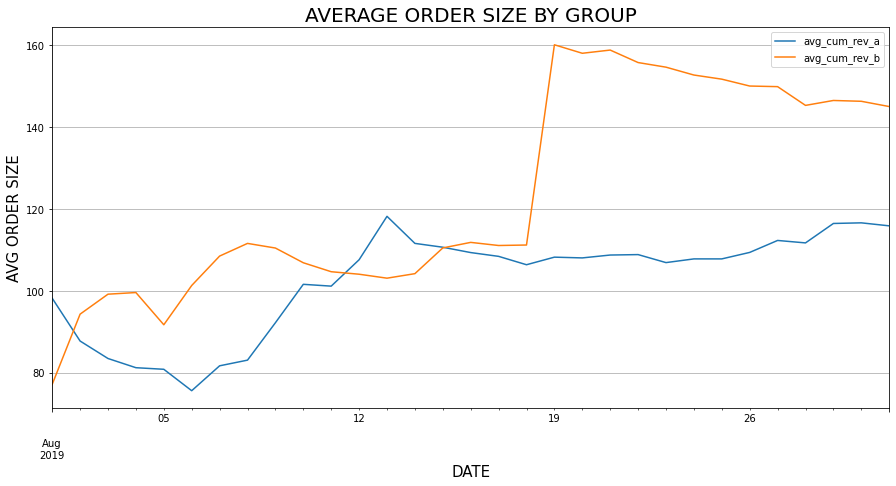

In [36]:
#line plot to show average order size for group A and B
avg_orders_merged.plot(kind= 'line', figsize= (15,7))
plt.title('AVERAGE ORDER SIZE BY GROUP', size= 20)
plt.xlabel('DATE', size= 15)
plt.ylabel('AVG ORDER SIZE', size= 15)
plt.grid()
plt.show()

Here we can definitely see that there was a large order spike at around August 18th. This has caused group B's average order size to drastically increase making our two line graphs look very different.

<b>Relative difference in cumulative average order size for group B compared with group A</b>

In [37]:
#creating a new dataset and calculating the difference between group A and B
avg_order_diff = pd.Series((avg_orders_merged['avg_cum_rev_b'] - avg_orders_merged['avg_cum_rev_a'])/avg_orders_merged['avg_cum_rev_a'])
avg_order_diff.head()

date
2019-08-01   -0.214431
2019-08-02    0.074915
2019-08-03    0.188429
2019-08-04    0.226225
2019-08-05    0.134662
dtype: float64

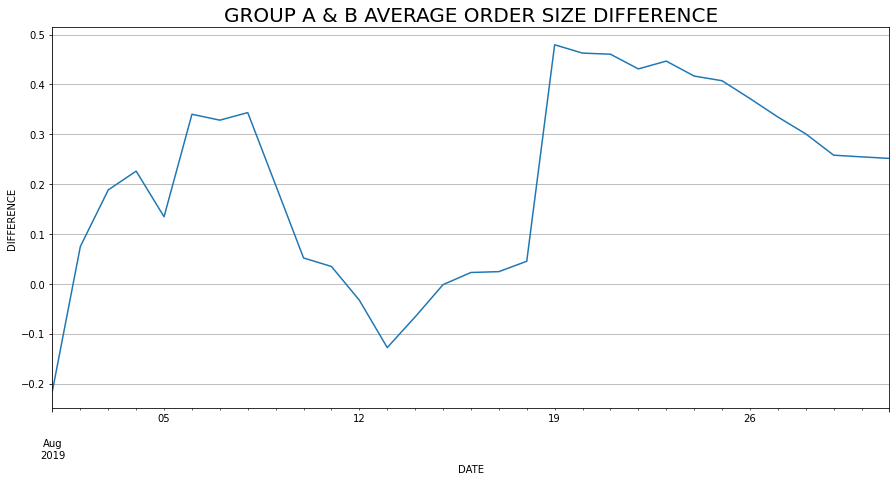

In [38]:
#plotting the differences between group A and B
avg_order_diff.plot(figsize=(15,7))
plt.title('GROUP A & B AVERAGE ORDER SIZE DIFFERENCE', size= 20)
plt.xlabel('DATE')
plt.ylabel('DIFFERENCE')
plt.grid()
plt.show()

<b>Each group's conversion rate as the ratio of orders to the number of visits for each day<b/>

In [39]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [40]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [41]:
#grouping by date and group and calculating total number of orders
group_conversion = orders.groupby(['date', 'group']).agg({'visitor_id': 'nunique'}).reset_index()
group_conversion.columns = ['date', 'group', 'uniq_buyers']
group_conversion.head()

,date,group,uniq_buyers
0,2019-08-01,A,20
1,2019-08-01,B,20
2,2019-08-02,A,19
3,2019-08-02,B,23
4,2019-08-03,A,24


In [42]:
#combining the 'group_conversion' table with the 'visits' table
group_conversion = group_conversion.merge(visits, on=['date', 'group'])
group_conversion.head()

,date,group,uniq_buyers,visits
0,2019-08-01,A,20,719
1,2019-08-01,B,20,713
2,2019-08-02,A,19,619
3,2019-08-02,B,23,581
4,2019-08-03,A,24,507


In [43]:
#creating new columns to show cumulative orders and visits
#group_conversion['cum_buyers']= group_conversion['uniq_buyers'].cumsum()
group_conversion['cum_visits']= group_conversion['visits'].cumsum()
group_conversion.head()

,date,group,uniq_buyers,visits,cum_visits
0,2019-08-01,A,20,719,719
1,2019-08-01,B,20,713,1432
2,2019-08-02,A,19,619,2051
3,2019-08-02,B,23,581,2632
4,2019-08-03,A,24,507,3139


In [44]:
#creating a new column for conversion rate, calculating conversion rate, and showing conversion rate as a percentage
group_conversion['conv_rate']= group_conversion['uniq_buyers']/ group_conversion['visits']*100
group_conversion.head()

,date,group,uniq_buyers,visits,cum_visits,conv_rate
0,2019-08-01,A,20,719,719,2.781641
1,2019-08-01,B,20,713,1432,2.805049
2,2019-08-02,A,19,619,2051,3.069467
3,2019-08-02,B,23,581,2632,3.958692
4,2019-08-03,A,24,507,3139,4.733728


In [45]:
#separating group A and B
conv_rate_a= group_conversion.query('group== "A"')
conv_rate_b= group_conversion.query('group== "B"')

#renaming columns
conv_rate_a= conv_rate_a.rename(columns={'conv_rate':'conv_rate_a'})
conv_rate_b= conv_rate_b.rename(columns={'conv_rate':'conv_rate_b'})

conv_rate_b.head()

,date,group,uniq_buyers,visits,cum_visits,conv_rate_b
1,2019-08-01,B,20,713,1432,2.805049
3,2019-08-02,B,23,581,2632,3.958692
5,2019-08-03,B,16,509,3648,3.143418
7,2019-08-04,B,16,770,5135,2.077922
9,2019-08-05,B,23,707,6598,3.253182


In [46]:
conv_rate_a.head()

,date,group,uniq_buyers,visits,cum_visits,conv_rate_a
0,2019-08-01,A,20,719,719,2.781641
2,2019-08-02,A,19,619,2051,3.069467
4,2019-08-03,A,24,507,3139,4.733728
6,2019-08-04,A,15,717,4365,2.092050
8,2019-08-05,A,25,756,5891,3.306878


In [47]:
#dropping all unnecessary columns
conv_rate_a.drop('group', axis=1, inplace=True)
#conv_rate_a.drop('total_orders', axis=1, inplace=True)
conv_rate_a.drop('visits', axis=1, inplace=True)
#conv_rate_a.drop('cum_buyers', axis=1, inplace=True)
conv_rate_a.drop('cum_visits', axis=1, inplace=True)
conv_rate_a.drop('uniq_buyers', axis=1, inplace=True)

conv_rate_b.drop('group', axis=1, inplace=True)
#conv_rate_b.drop('total_orders', axis=1, inplace=True)
conv_rate_b.drop('visits', axis=1, inplace=True)
#conv_rate_b.drop('cum_buyers', axis=1, inplace=True)
conv_rate_b.drop('cum_visits', axis=1, inplace=True)
conv_rate_b.drop('uniq_buyers', axis=1, inplace=True)
conv_rate_b.head()

,date,conv_rate_b
1,2019-08-01,2.805049
3,2019-08-02,3.958692
5,2019-08-03,3.143418
7,2019-08-04,2.077922
9,2019-08-05,3.253182


In [48]:
#combining both tables
conv_rate_merged= pd.merge(conv_rate_a, conv_rate_b, on= 'date').set_index('date')
conv_rate_merged.head()

,conv_rate_a,conv_rate_b
date,,
2019-08-01,2.781641,2.805049
2019-08-02,3.069467,3.958692
2019-08-03,4.733728,3.143418
2019-08-04,2.092050,2.077922
2019-08-05,3.306878,3.253182


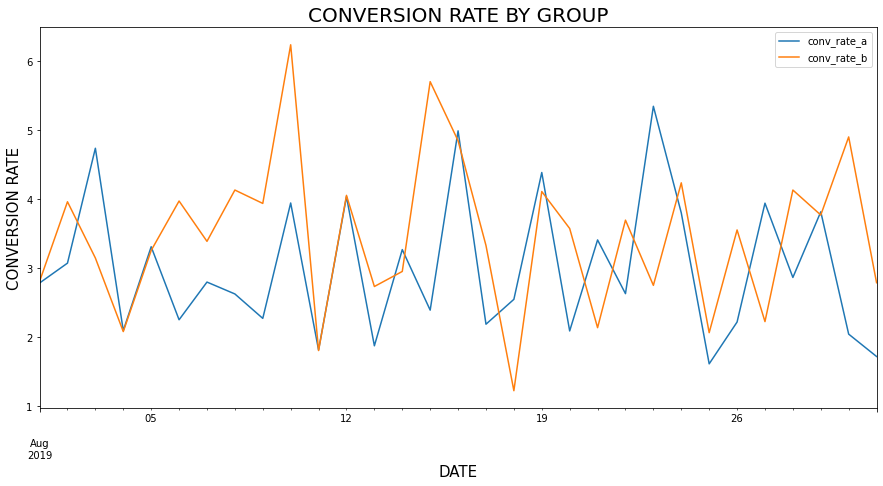

In [49]:
#line plot to show conversion rates for group A and B
conv_rate_merged.plot(kind= 'line', figsize= (15,7))
plt.title('CONVERSION RATE BY GROUP', size= 20)
plt.xlabel('DATE', size= 15)
plt.ylabel('CONVERSION RATE', size= 15)
plt.show()

Customers for both group A and B seem to be making their first purchases within the first week. After that, it drops for both groups. Generally both groups decrease after the first week of the month.

In [50]:
# the reviewer's cell:
group_conversion.uniq_buyers.sum(), orders.visitor_id.nunique()


(1171, 1031)

In [51]:
# the reviewer's cell: the code from Practicum sprint data:

# make the dataframes with unique dates for each group:
datesGroups = orders[['date','group']].drop_duplicates()

# agregate the data for orders - calculate for each day of the test the number of unique buyers 
# who made a purchase from the start of the test to the day for which we look at the statistics:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'transaction_id' : 'nunique',
    'visitor_id' : 'nunique',
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# make same for visits data:
visitsAggregated = datesGroups.apply(
lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

# merge data:
cummulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

cummulativeData.head(5)

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [52]:
# the reviewer's cell: check the overall number of users:
cummulativeData.query('group == "A"').buyers.max(), orders.query('group == "A"').visitor_id.nunique()

(503, 503)

In [53]:
# the reviewer's cell: check the overall number of users:
cummulativeData.query('group == "B"').buyers.max(), orders.query('group == "B"').visitor_id.nunique()

(586, 586)

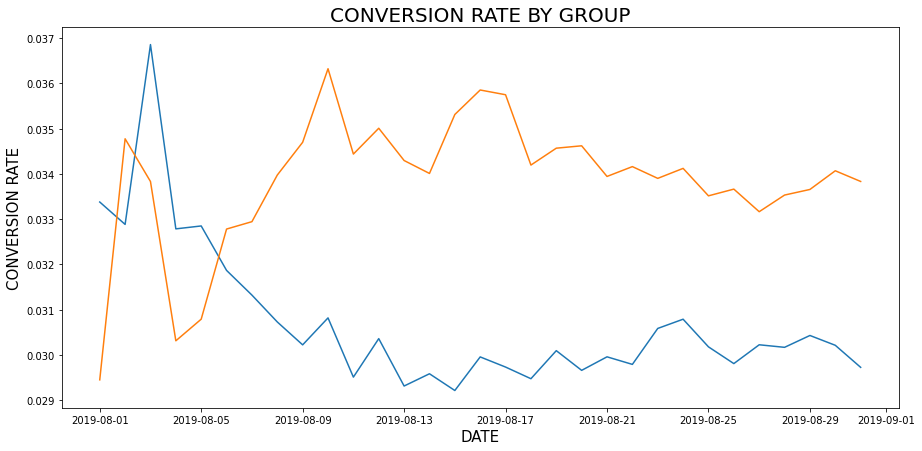

In [54]:
#line plot to show conversion rates for group A and B

plt.figure(figsize=(15,7))

cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visits']
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')

plt.title('CONVERSION RATE BY GROUP', size= 20)
plt.xlabel('DATE', size= 15)
plt.ylabel('CONVERSION RATE', size= 15)
plt.show()

<b>Scatter chart of the number of orders per user</b>

In [55]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [56]:
orders_per_user= orders.groupby(['visitor_id','group'])['transaction_id'].count().reset_index()
orders_per_user= orders_per_user.rename(columns= {'transaction_id':'orders_count'})

orders_per_user.head()

,visitor_id,group,orders_count
0,5114589,B,1
1,6958315,B,1
2,8300375,A,1
3,8300375,B,1
4,11685486,A,1


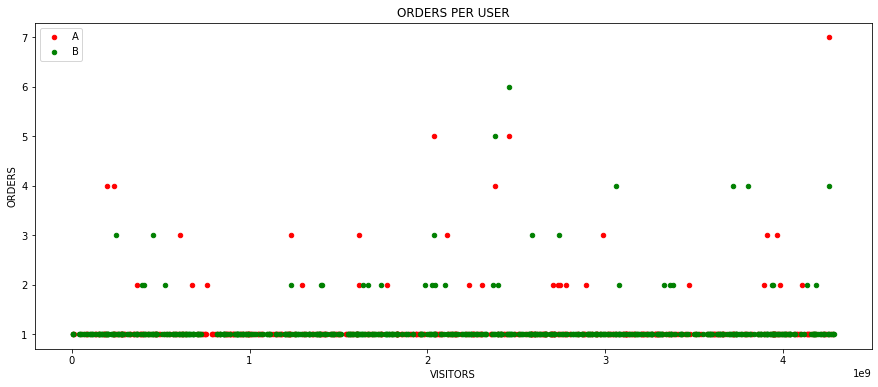

In [57]:
fig, ax = plt.subplots()

colors = {'A':'red', 'B':'green'}

grouped = orders_per_user.groupby('group')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='visitor_id', y='orders_count', label=key, color=colors[key],figsize= (15,6))

plt.title('ORDERS PER USER')
plt.xlabel("VISITORS")
plt.ylabel("ORDERS")
plt.show()

In [58]:
#orders_per_user.plot(x= 'visitor_id', y= 'orders_count',kind= 'scatter', figsize= (15,6))
#plt.title('ORDERS PER USER')
#plt.xlabel("VISITORS")
#plt.ylabel("ORDERS")

#plt.show()


There are users who make between 2 to 11 purchases, but the majority of users seem to only make one purchase. 

<b>The 95th and 99th percentiles for the number of orders per user</b>

In [59]:
percentile_95, percentile_99 = np.percentile(orders_per_user['orders_count'], [95, 99])

print(f'In the 95th percentile, users only purchased {int(percentile_95)} orders')
print(f'In the 99th percentile, users only purchased {int(percentile_99)} orders')

In the 95th percentile, users only purchased 2 orders
In the 99th percentile, users only purchased 4 orders


<b>Scatter chart of order prices</b>

In [60]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


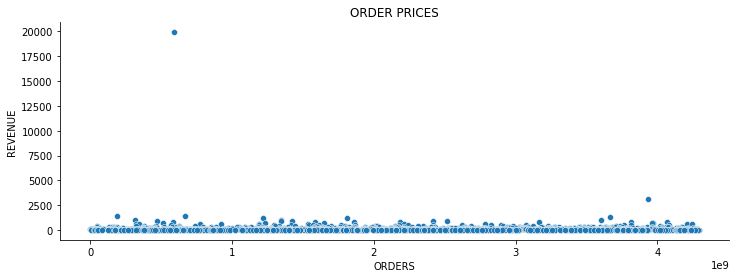

In [61]:
plt.figure(figsize=(12, 4))
sns.scatterplot(data=orders.sort_values(by='revenue', ascending=False),
                x='transaction_id',
                y='revenue').set(xlabel='ORDERS',
                                 ylabel='REVENUE',
                                 title='ORDER PRICES')
sns.despine();

Looks like most of the orders are below 2,500. However there is one order that is around 20,000. This is definitely an anomaly. 

<b>The 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.</b>



In [62]:
percentile_price_95, percentile_price_99 = np.percentile(orders['revenue'], [95, 99])

print(f'No more than 5% of customers placed orders above {int(percentile_price_95)} in revenue')
print(f'No more than 1% of customers placed orders above {int(percentile_price_99)} in revenue')

No more than 5% of customers placed orders above 435 in revenue
No more than 1% of customers placed orders above 900 in revenue


# A/B Testing

<b>Statistical significance of the difference in conversion between the groups using the raw data</b>



Since there is an outlier that will significantly skew the data, we'll use the Mann-Whitney U test. The key idea behind the test is to rank two samples in ascending order and compare the ranks of values that appear in both samples (i.e. in which position they appear in the samples). If the differences between their ranks are the same from sample to sample, this means the shift is typical. That means some values were simply added, causing the rest to shift.

Null Hypothesis: There is no significant statistical difference in conversion between group A and B
    
Alternate Hypothesis: There is a significant statistical difference in conversion between group A and B

In [63]:
# separating group A and B and grouping by visitor_id and unique transactions
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
ordersByUsersB.columns = ['user_id', 'orders']

# delcare vars with users from different groups and the number of users / group
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

p_value = st.mannwhitneyu(sampleA, sampleB)[1]
print('P-Value:',p_value)

alpha = 0.05

if p_value < alpha:
    print('Null hypothesis rejected: the difference is statistically significant')
else:
    print('Failed to reject the Null Hypothesis: we can\'t make conclusions about the difference')
    
print("Sample A Mean Value:",sampleA.mean().round(decimals= 3))
print("Sample B Mean Value:",sampleB.mean().round(decimals= 3))      
print("Relative difference: {0:.2f}%".format((sampleB.mean() / sampleA.mean() - 1) * 100))


P-Value: 0.020456112148351076
Null hypothesis rejected: the difference is statistically significant
Sample A Mean Value: 0.03
Sample B Mean Value: 0.034
Relative difference: 13.31%


Since the p_value is less than the alpha level 0.05, we can reject the null hypothesis. The difference between the conversion rate of groups A and B is statistically significant. This means there is a non-typical shift in the data.

<b>Statistical significance of the difference in average order size between the groups using the raw data</b>



In [64]:
#using the Mann-Whitney U to test the group A versus group B revenues
p_value = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]
print("P-Value: {0:.3f}".format(p_value))
alpha = 0.05

if p_value < alpha:
    print('Null hypothesis rejected: the difference is statistically significant')
else:
    print('Failed to reject the Null Hypothesis: we can\'t make conclusions about the difference')

P-Value: 0.692
Failed to reject the Null Hypothesis: we can't make conclusions about the difference


Since the p_value is more than the alpha level 0.05, we fail to reject the null hypothesis. We can't make any conclusions that there is a significant difference between the average order size between groups A and B. This means there is a typical shift in the data.

<b>Statistical significance of the difference in conversion between the groups using the filtered data</b>



In [65]:
# get all visits for each group

all_visits_A = visits.query('group == "A"')['visits'].sum()
all_visits_B = visits.query('group == "B"')['visits'].sum()

In [66]:
# creating sample variables for group A and B for number of orders

sample_A = orders.query('group == "A"').groupby('visitor_id')['transaction_id'].count().reset_index()
sample_A = sample_A.drop('visitor_id', axis=1).sort_values(by='transaction_id', ascending=False).reset_index(drop=True)
sample_A = sample_A.squeeze()
sample_A = sample_A.append(pd.Series(0, index=np.arange(all_visits_A - len(sample_A))))

sample_B = orders.query('group == "B"').groupby('visitor_id')['transaction_id'].count().reset_index()
sample_B = sample_B.drop('visitor_id', axis=1).sort_values(by='transaction_id', ascending=False).reset_index(drop=True)
sample_B = sample_B.squeeze()
sample_B = sample_B.append(pd.Series(0, index=np.arange(all_visits_B - len(sample_B))))

alpha = 0.05

results = st.mannwhitneyu(sample_A, sample_B)[1]

print("P-Value: {0:.3f}".format(results))

if (results < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

print("Relative difference: {0:.2f}%".format((sample_B.mean() / sample_A.mean() - 1) * 100)) 

P-Value: 0.017
Null hypothesis rejected: the difference is statistically significant
Relative difference: 13.81%


Since the p_value is less than the alpha level 0.05, we can reject the null hypothesis. The difference between the conversion rate of groups A and B is statistically significant. This means there is a non-typical shift in the data.

<b>Statistical significance of the difference in average order size between the groups using the filtered data</b>


In [67]:
# filter revenue data to exclude any anomalies
revenue_lim = percentile_price_99
filtered_revenue_A = orders.query('(group == "A") & (revenue <= @revenue_lim)')['revenue']
filtered_revenue_B = orders.query('(group == "B") & (revenue <= @revenue_lim)')['revenue']
#filtered_revenue_A = orders.query('(group == "A") & (revenue <= 900)')['revenue']
#filtered_revenue_B = orders.query('(group == "B") & (revenue <= 900)')['revenue']

# run Mann-Whitney U test

results= st.mannwhitneyu(filtered_revenue_A, filtered_revenue_B)[1]

print('P-Value: {0:.3f}'.format(results))

if (results < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference")

print('Relative difference: {0:.2f}%'.format((filtered_revenue_B.mean() / filtered_revenue_A.mean()-1) * 100)) 

P-Value: 0.585
Failed to reject the null hypothesis: we can't make conclusions about the difference
Relative difference: 1.81%


Since the p_value is more than the alpha level 0.05, we fail to reject the null hypothesis. We can't make any conclusions that there is a significant difference between the average order size between groups A and B. This means there is a typical shift in the data.

<b>Make a decision based on the test results. The possible decisions are:</b> 
1. Stop the test, consider one of the groups the leader. 
2. Stop the test, conclude that there is no difference between the groups. 
3. Continue the test.

There seems to be a significant difference in conversion rate between group A and B, with group B performing better. When it comes to order size by group, group B has a significantly larger order size than group A. We can make a decision based on our results and conclude that group B is the leader. 